# PCA Visualization for entire CA (2010)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
#
# All CSVs created from Scala MLib PCA algorithm, CA 
#
m_file_prefixes= ['/var/tmp/ca_2010/total_flow_', '/var/tmp/ca_2010/occupancy_', '/var/tmp/ca_2010/speed_']
fid= "CA_2010"

In [4]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')

## NOTE: All visualizations against dataset with no standardization

# Mean Vector

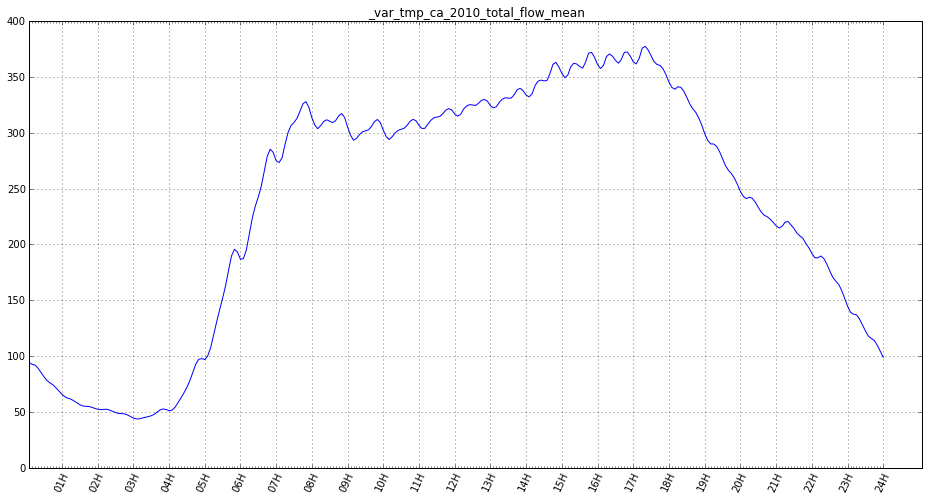

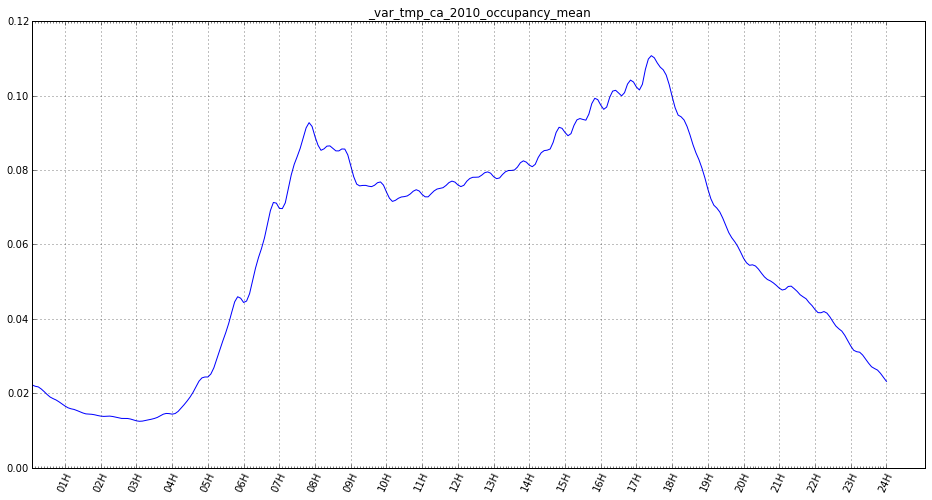

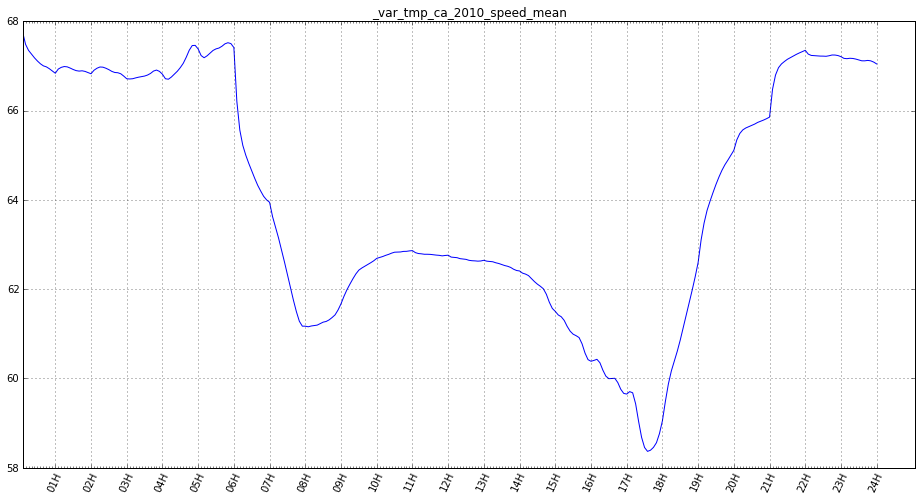

In [5]:
for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'mean_vector.{}.csv'.format(fid)
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    #
    ax.plot(m_mean_vector)
    #
    m_title= p.replace('/', '_') + 'mean'
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
    #
    m_output_filename= p + 'mean_vector.pdf'
    fig.savefig(m_output_filename)

# Perc. Variance Explained

[0, 0.80559469600939726, 0.89960607833314465, 0.9284378957800179, 0.94190417421609185, 0.95393794238370866, 0.95923796345355994, 0.96292206082850496, 0.96561314531022113, 0.96779842070499311, 0.96926218918222307, 0.97059124927993867, 0.97151727207945571, 0.97229167651992099, 0.97301719155941313, 0.97364187370103994, 0.97417730677251624, 0.97466199465427183, 0.9751032735481352, 0.97549601902481264, 0.97588146992775582, 0.97625000580001264, 0.97661375264513517, 0.97694251283301414, 0.97725676193167654, 0.97755476601718605, 0.97784511642443006, 0.97812194071334091, 0.97839047346315078, 0.97865142607338473, 0.97890905469790623]
[0, 0.56410800126365745, 0.71756721123580181, 0.77879260235407466, 0.80621294591692438, 0.82844388209820563, 0.84576007882046167, 0.86027391854372848, 0.87182935564139263, 0.88088373885015236, 0.88790252481773158, 0.89480349672923587, 0.9001712977111701, 0.90530536670876061, 0.90958235901349482, 0.91360971010027026, 0.91698992659136414, 0.92027395865276973, 0.923167

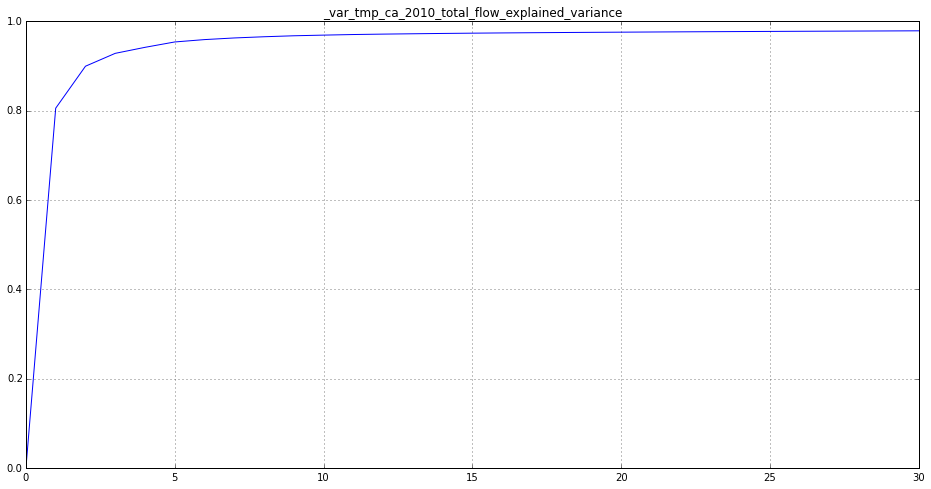

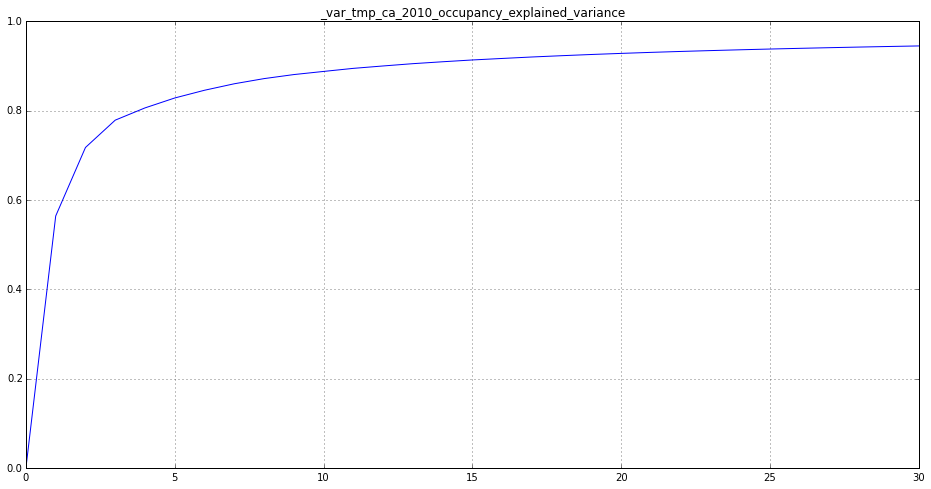

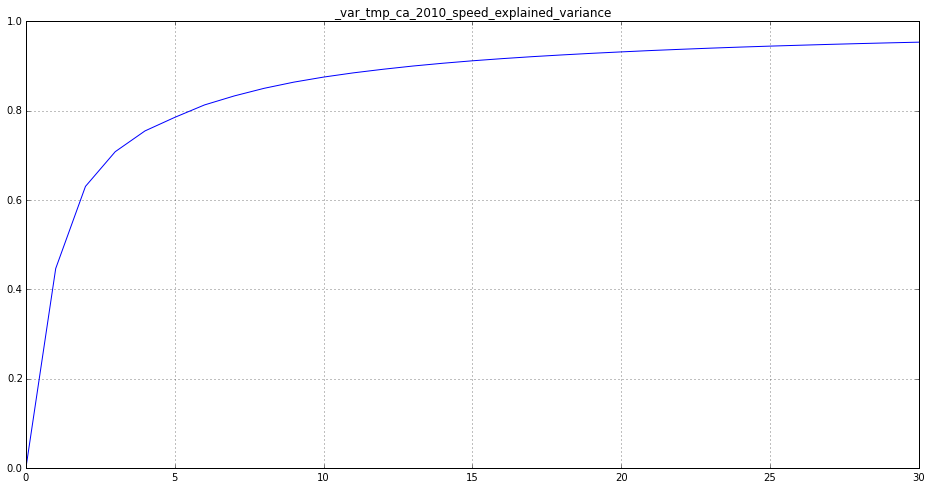

In [6]:
k= 30

for p in m_file_prefixes:
    fig, ax= plt.subplots(figsize=(16,8))
    m_filename= p + 'eigenvalues.{}.csv'.format(fid)
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
    m_plot_arr = ([0, ] + list(np.cumsum(m_eig_values[:k])))
    print(m_plot_arr)
    ax.plot(m_plot_arr)
    #
    m_title= p.replace('/', '_') + 'explained_variance'
    ax.set_title(m_title)
    ax.grid()
    #
    m_output_filename= p + 'explained_variance.pdf'
    fig.savefig(m_output_filename)

# Top 10 Eigenvectors

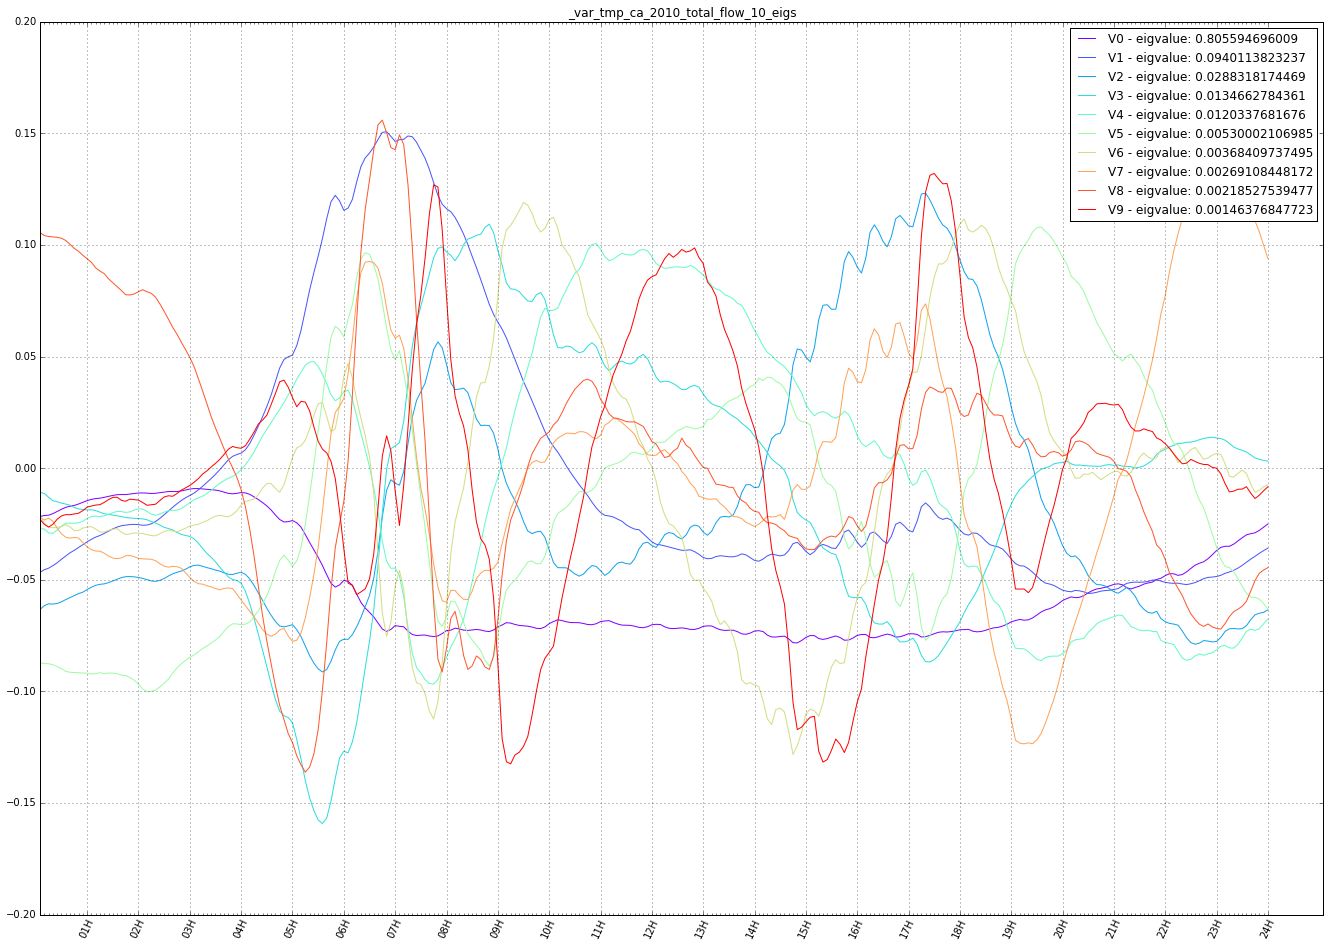

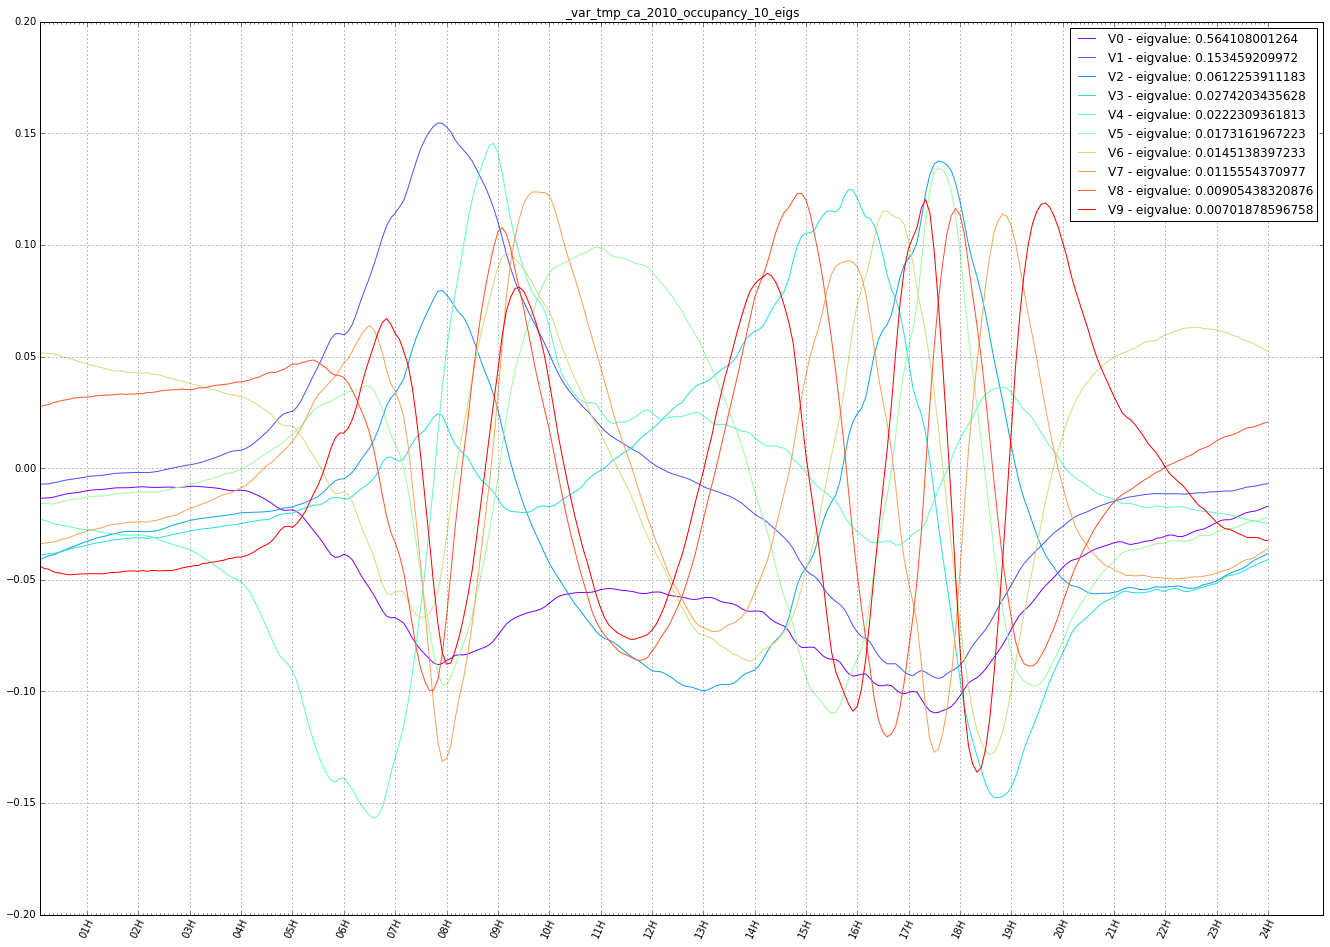

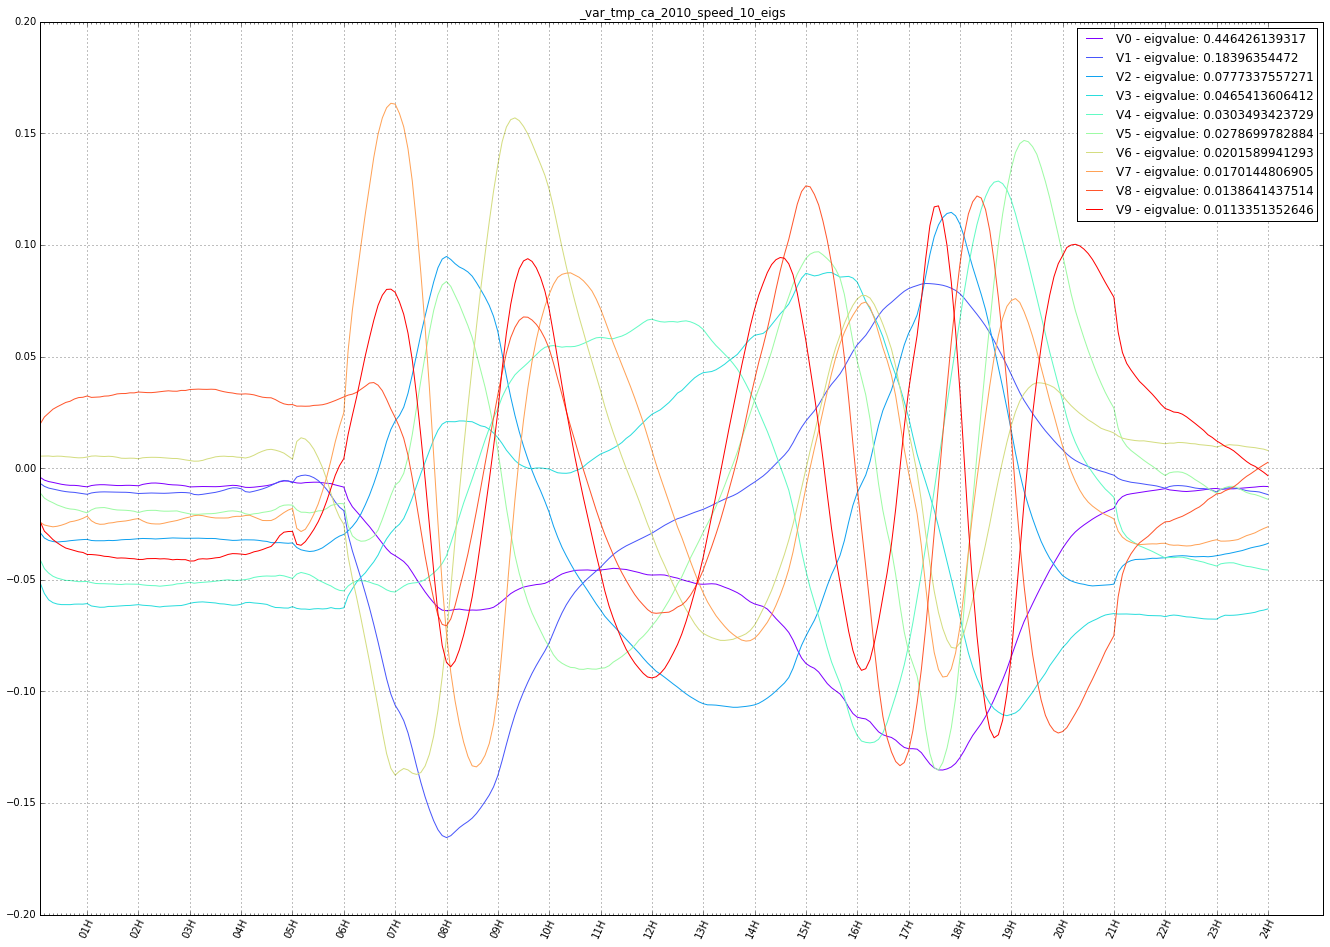

In [7]:
from matplotlib.pyplot import cm

n= 10
for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.{}.csv'.format(fid)
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    #
    m_filename= p + 'eigenvalues.{}.csv'.format(fid)
    m_eig_values= pd.read_csv(m_filename, header=None).values[0]
    #
    colors=cm.rainbow(np.linspace(0,1,n))

    width= 23
    height= 16
    fig, ax= plt.subplots(figsize=(width,height))
    l_x= [i for i in xrange(shape(m_eigs_t)[1])]
    for i in xrange(n):
        l_y= m_eigs_t[i]
        m_eig_value= m_eig_values[i]
        m_label= 'V{} - eigvalue: {}'.format(i, m_eig_value)
        ax.plot(l_x, l_y, color=colors[i], label=m_label)
    ax.legend()
    #
    m_title= p.replace('/', '_') + '10_eigs'
    ax.set_title(m_title)
    #
    set_xaxis(ax, shape(m_eigs_t)[1])
    #
    m_output_filename= p + '10_eigs.pdf'
    fig.savefig(m_output_filename)

# Reconstruction on Top Eigenvectors

In [8]:
def get_reconstruction(eigenvectors, Mean, x, k):
    # Compute the projection of the data on the top k eigen-vectors
    U = eigenvectors[:k]
    #
    Eig = np.matrix(U.T)
    matrix = np.matrix(x) - Mean
    matrix[np.isnan(matrix)] = 0
    m_projection = matrix * Eig;
    #
    rec = np.array(m_projection * Eig.transpose() + Mean)
    #rec= Eig*m_projection.transpose()+Mean[:,np.newaxis]
    rec = np.ravel(rec)
    return (x, rec)

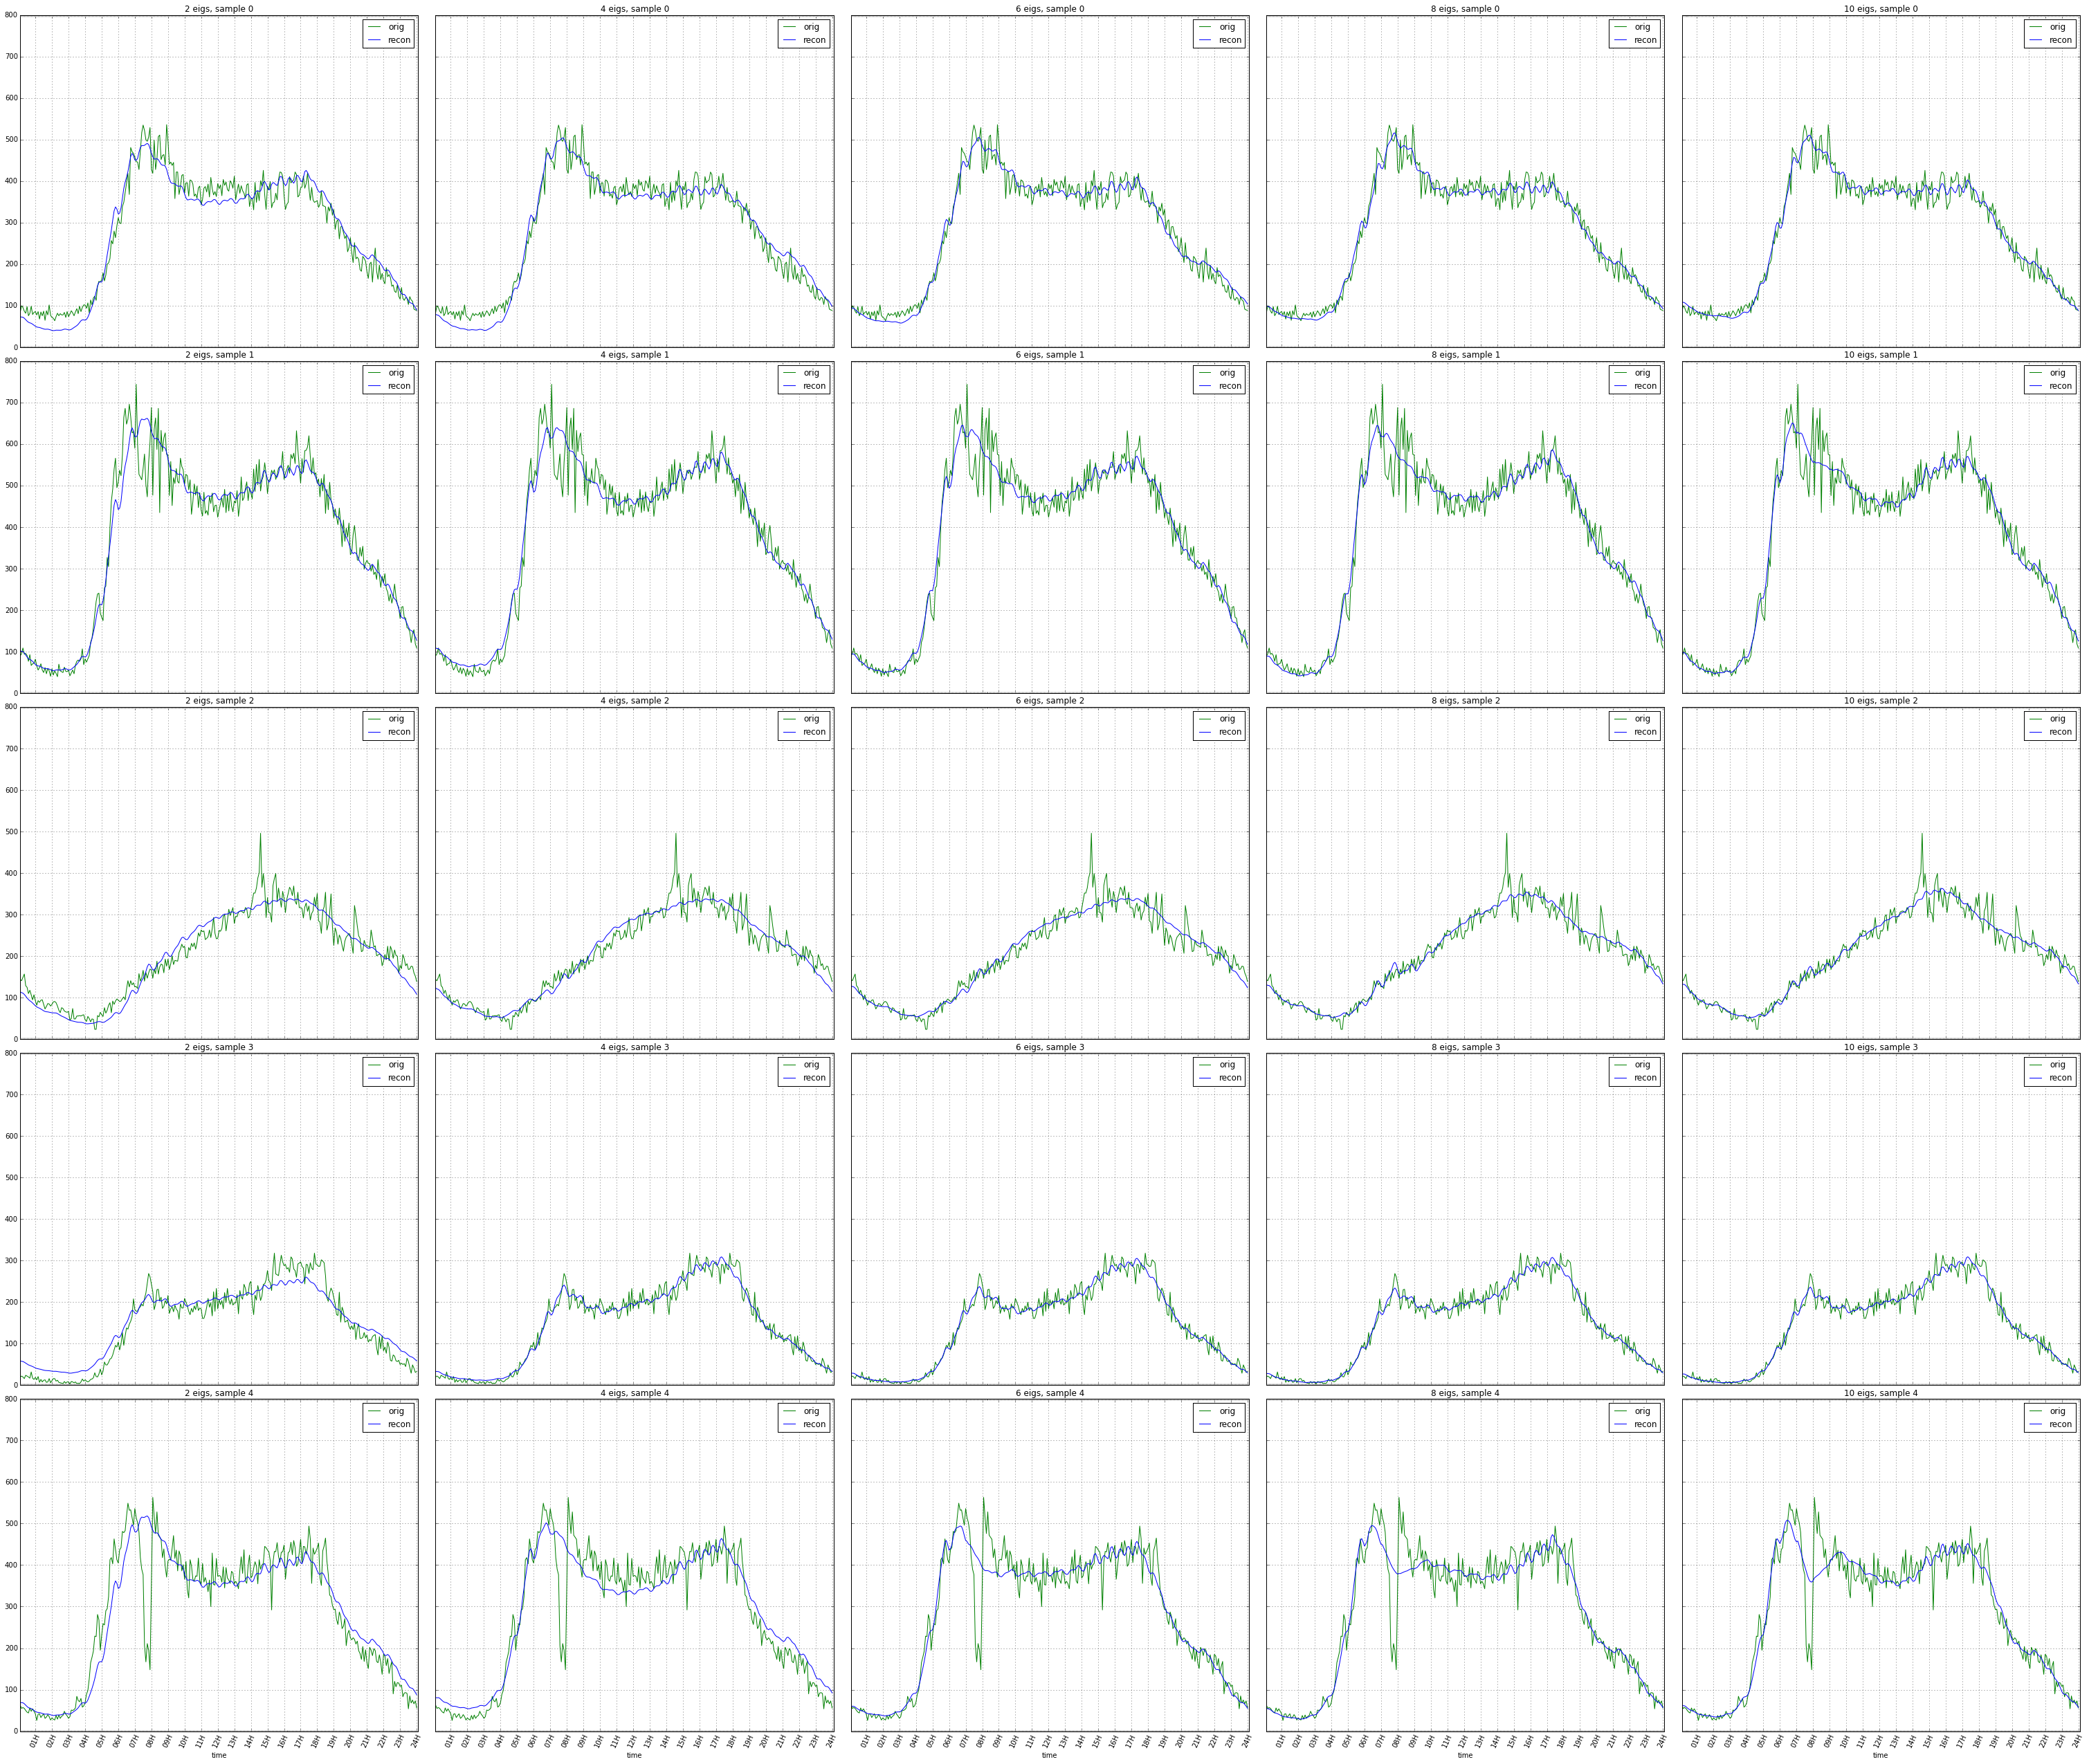

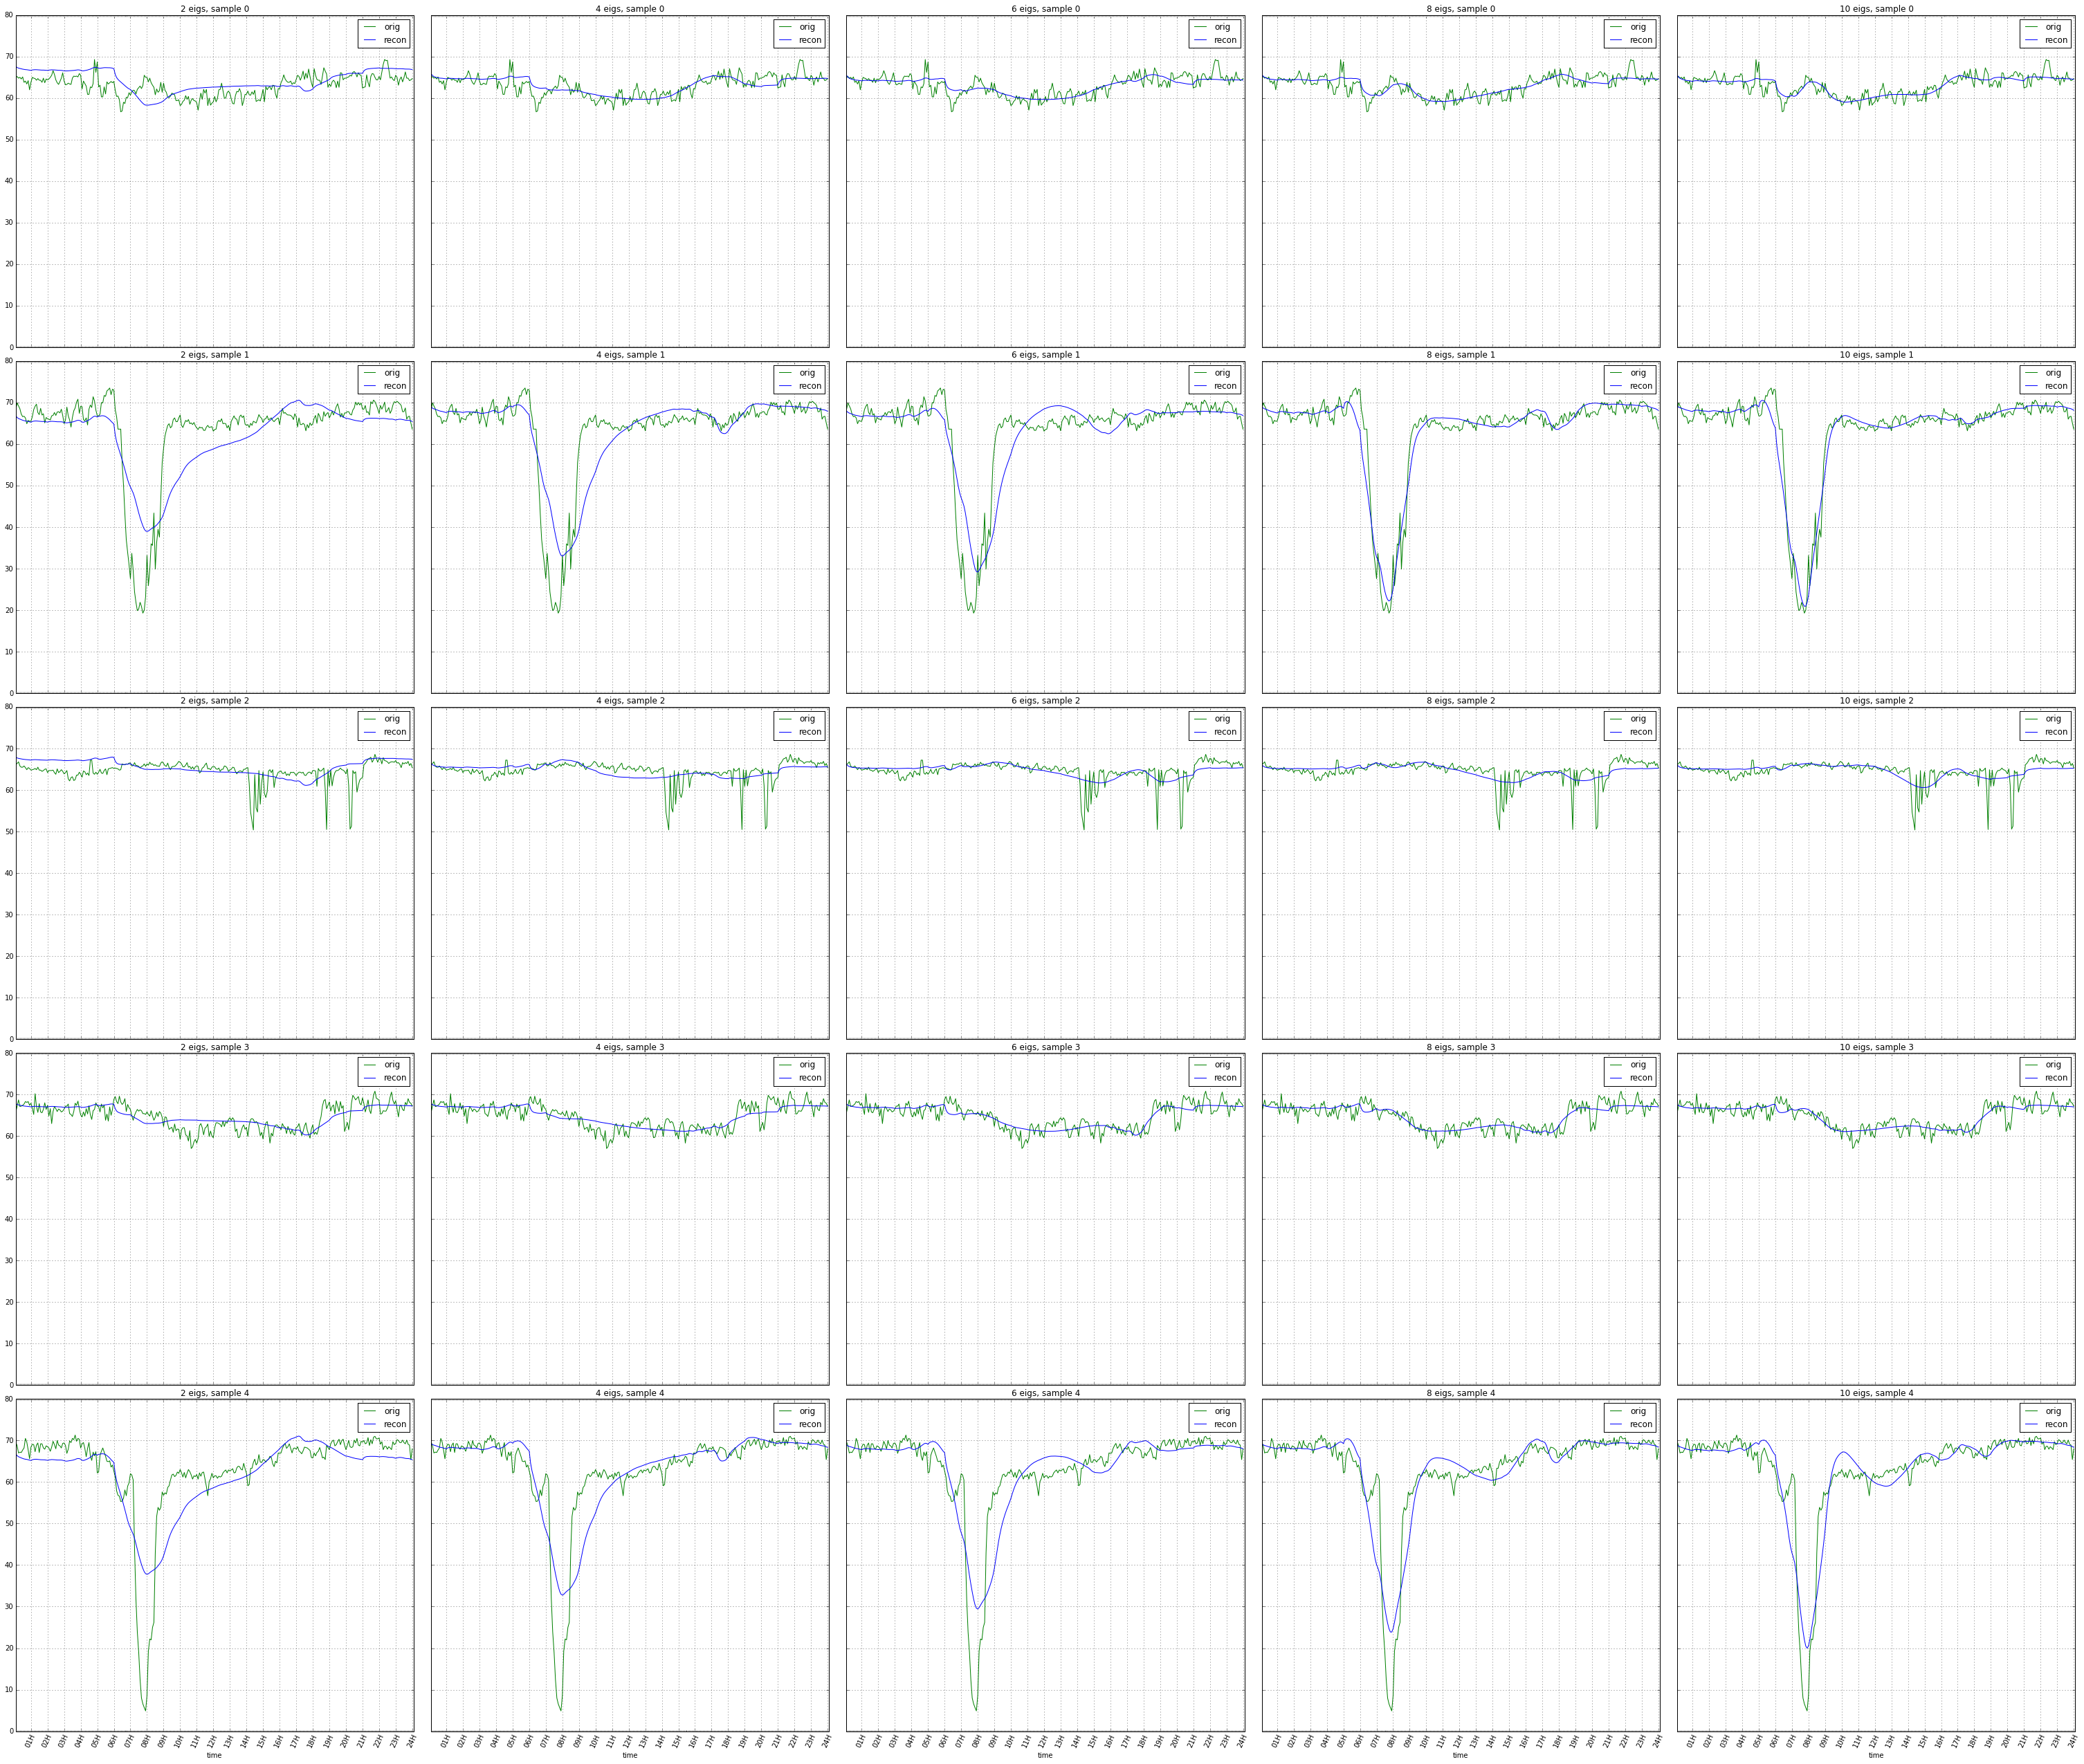

In [9]:
ks = [2, 4, 6, 8, 10]
rows= 5
columns= len(ks)

for p in m_file_prefixes:
    m_filename= p + 'eigenvectors.{}.csv'.format(fid)
    m_eigs= pd.read_csv(m_filename, header=None).values
    m_eigs_t= m_eigs.T
    
    m_filename= p + 'mean_vector.{}.csv'.format(fid)
    m_mean_vector= pd.read_csv(m_filename, header=None).values[0]
    
    m_filename= p + 'samples.{}.csv'.format(fid)
    m_samples= pd.read_csv(m_filename, header=None).values
    
    fig, axes = plt.subplots(nrows=rows, ncols=columns, sharex=True, sharey=True, figsize=(42, 35))
    plt.tight_layout()
    for row in xrange(rows):
        x = m_samples[row]
        for col in xrange(columns):
            k= ks[col]
            m_rec_struct = get_reconstruction(m_eigs_t, m_mean_vector, x, k)
            m_orig_x = m_rec_struct[0]
            m_rec = m_rec_struct[1]

            ax = axes[row, col]
            ax.plot(m_orig_x, c='g', label='orig')
            ax.plot(m_rec, c='b', label='recon')
            ax.set_xlim([0, len(m_orig_x)])
            ax.set_title("{} eigs, sample {}".format(k, row))
            ax.legend()
            #
            set_xaxis(ax, shape(m_eigs_t)[1])
            #
            if row == (rows - 1):
                ax.set_xlabel("time")
    m_output_filename= p + 'reconstruction.pdf'
    fig.savefig(m_output_filename)